# Install Packages

In [1]:
#pip install opencv-python

In [2]:
#pip install -U seaborn

In [3]:
 !pip install shap

In [4]:
import shap

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import matplotlib.image as mpimg
from matplotlib import *


In [165]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Input,Flatten, Dense, Dropout, Conv2D,concatenate
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.initializers import he_normal, zeros, glorot_normal, RandomNormal
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [7]:
# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Extract Data from Images

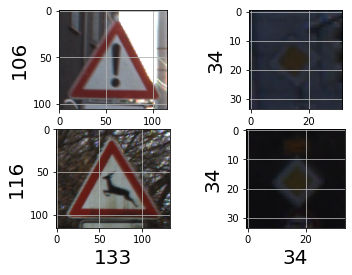

In [28]:
import random
from matplotlib.image import imread
dataset_dir = 'C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\'
meta_info = os.path.join(dataset_dir, 'Meta.csv')
train_csv_path = os.path.join(dataset_dir, 'Train.csv')
test_csv_path = os.path.join(dataset_dir, 'Test.csv')

test = pd.read_csv(dataset_dir + 'Train.csv')
imgs = test["Path"].values
imgs

# Visualizing 25 random images from train data
import random
from matplotlib.image import imread
dataset_dir = 'C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\'
meta_info = os.path.join(dataset_dir, 'Meta.csv')
train_csv_path = os.path.join(dataset_dir, 'Train.csv')
test_csv_path = os.path.join(dataset_dir, 'Test.csv')

test = pd.read_csv(dataset_dir + 'Train.csv')
imgs = test["Path"].values

#plt.figure(figsize=(25,25))

for i in range(1,5):
    plt.subplot(2,2,i)
    random_img_path = dataset_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [29]:
train_data_color = '#0f7b8e'
test_data_color = '#630f8e'

df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)
df_meta = pd.read_csv(meta_info)

df_train['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), df_train['Path']))
df_test['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), df_test['Path']))
df_meta['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), df_meta['Path']))

df_train.sample(3)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
36574,32,32,6,6,27,27,38,C:\Drive\Siri\MSDSBA\4. IE7860 Intelligent Ana...
34811,39,39,6,6,34,34,35,C:\Drive\Siri\MSDSBA\4. IE7860 Intelligent Ana...
35543,46,48,6,6,41,43,36,C:\Drive\Siri\MSDSBA\4. IE7860 Intelligent Ana...


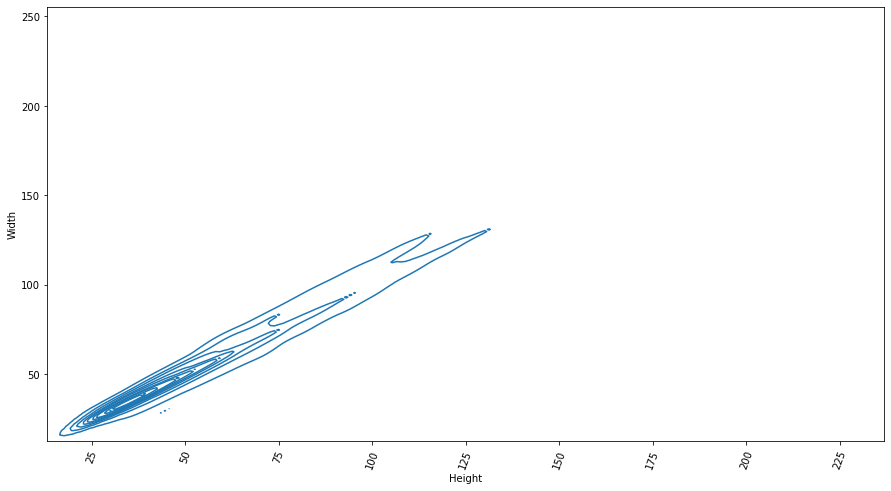

In [30]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
plt_box=sns.kdeplot(data=df_train, x="Height", y="Width")

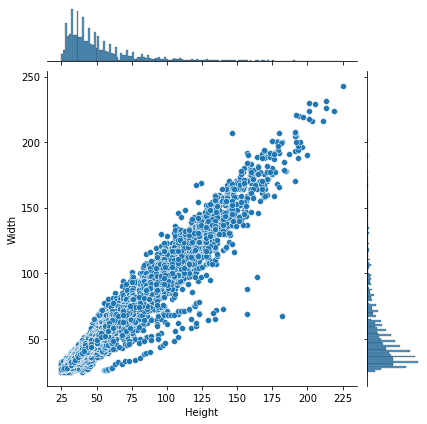

In [31]:
sns.jointplot(data=df_train, x="Height", y="Width")

In [32]:
data = []
labels = []
classes = 43
#cur_path = 'C:\\Users\\adari\\data\\'
cur_path = 'C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\'
# cur_path = 'C:\\Users\\Triveni\\Desktop\\MSDSBA\\Winter 2021\\IA\\Project\\Data\\'

In [33]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [34]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


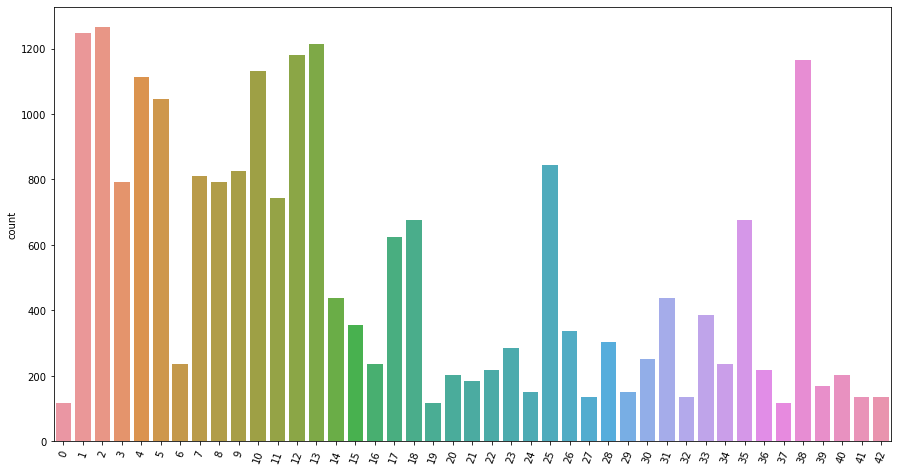

In [35]:
#Checking for class imbalance in training set
# Below plot shows the class distribution of the training images.

plt.figure(figsize=(15,8))
plt.xticks(rotation=70)
plt_box=sns.countplot(labels)

Observations :
1. The target classes are clearly not uniformly distributed.
2. This is quite logical since some signs like “Keep speed below 30 K-mph” or “A bump ahead” appears more often then signs like “Road under construction ahead”.
3. Images are unevenly distributed among each class. Some classes have around 2500 images while others have as low as 250 images.
4. Less number of images can undermine the training process. We can use Data-Augmentation to overcome the lack of adequate number of images in some classes. 

It’s always a good practice to understand where your model stands without doing any preprocessing as that would help you establish a score for your model, which you could improve upon each iteration. The evaluation metric for our model would be “accuracy” score. Using a fully connected Sequential Neural Netwrok Architecture for Baseline Scores and other testing

# ESTABLISHING SCORE WITHOUT ANY PREPROCESSING

The model = Sequential() statements loads the network. The input shape is 2700 (as images have 3 color channels). 
The Activation function is “relu”. During hyperparameters optimization we can check with Tanh, Sigmoid and other activation function if they are better suited for the task. For now we stick on to “relu”.
There are 4 hidden layers of 128 neurons with relu activation and after each hidden layer except the last one a dropout(50%) function is included.
The output layer has the softmax activation since we are dealing with multi class classification and there are 43 classes.

In [36]:
#Splitting training and testing dataset
X_train,X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

In [37]:
from sklearn.metrics import accuracy_score
# y_test = pd.read_csv('C:\\Users\\Triveni\\Desktop\\MSDSBA\\Winter 2021\\IA\\Project\\Data\\Test.csv')
y_test = pd.read_csv('C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\Test.csv')
#y_test = pd.read_csv('C:\\Users\\adari\\data\\Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
#     image = Image.open("C:\\Users\\Triveni\\Desktop\\MSDSBA\\Winter 2021\\IA\\Project\\Data\\"+img)
    image = Image.open("C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\"+img)
    #image = Image.open("C:\\Users\\adari\\data\\"+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [38]:
#Converting the labels into one hot encoding

y_train_cnn = to_categorical(y_train, 43)
y_val_cnn = to_categorical(y_val, 43)

In [39]:
y_train_cnn.shape

(17625, 43)

In [40]:
X_train=np.array(X_train)

In [41]:
X_val=np.array(X_val)

In [42]:
print(X_train.shape)
print(y_train.shape)

(17625, 30, 30, 3)
(17625,)


In [43]:
print(X_val.shape)
print(y_val.shape)

(4407, 30, 30, 3)
(4407,)


In [44]:
X_test.shape

(12630, 30, 30, 3)

In [45]:
y_test.shape

(12630, 8)

In [46]:
# # Flatten input: Changing dimension of input images from N*30*30*3 to N*2700
X_train_rs = X_train.reshape([X_train.shape[0], -1])
X_val_rs = X_val.reshape([X_val.shape[0], -1])

In [47]:
print(X_train_rs.shape)
print(X_val_rs.shape)

(17625, 2700)
(4407, 2700)


In [48]:
X_test_rs = X_test.reshape([X_test.shape[0], -1])

In [49]:
print(X_test_rs.shape)

(12630, 2700)


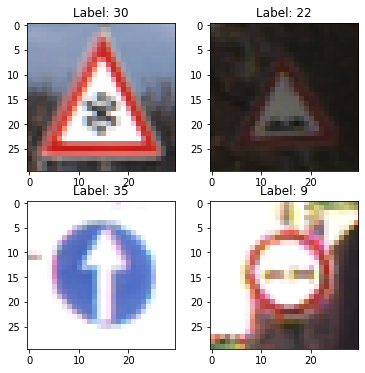

In [50]:
plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train_rs[i].reshape([30,30,3]));

In [51]:
## Changing labels to one-hot encoded vector
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(y_train)
y_val_one_hot = lb.transform(y_val)
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_val_one_hot.shape)

Train labels dimension:
(17625, 43)
Test labels dimension:
(4407, 43)


In [52]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_test_one_hot = lb.fit_transform(labels)
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_val_one_hot.shape)

Train labels dimension:
(17625, 43)
Test labels dimension:
(4407, 43)


# Basic Models

## MLP

In [53]:
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
n_classes = len(np.unique(labels))
model=tf.keras.Sequential()
model.add(keras.layers.Dense(128,input_dim=2700, activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dense(n_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
history = model.fit(X_train_rs, y_train_one_hot, validation_data = (X_val_rs, y_val_one_hot), epochs=15, batch_size=128, verbose=2)
score_mlp = model.evaluate(X_val_rs, y_val_one_hot,batch_size=1, verbose=0)
print('Test loss:', score_mlp[0], '   Test accuracy:', score_mlp[1])


Epoch 1/15
138/138 - 3s - loss: 3.2831 - accuracy: 0.1750 - val_loss: 2.7257 - val_accuracy: 0.2539
Epoch 2/15
138/138 - 1s - loss: 2.0110 - accuracy: 0.4137 - val_loss: 1.9887 - val_accuracy: 0.4118
Epoch 3/15
138/138 - 1s - loss: 1.4596 - accuracy: 0.5540 - val_loss: 1.3704 - val_accuracy: 0.6031
Epoch 4/15
138/138 - 1s - loss: 1.1062 - accuracy: 0.6637 - val_loss: 1.0502 - val_accuracy: 0.6742
Epoch 5/15
138/138 - 1s - loss: 0.9230 - accuracy: 0.7183 - val_loss: 0.8034 - val_accuracy: 0.7497
Epoch 6/15
138/138 - 1s - loss: 0.8134 - accuracy: 0.7525 - val_loss: 0.6515 - val_accuracy: 0.8003
Epoch 7/15
138/138 - 1s - loss: 0.7216 - accuracy: 0.7809 - val_loss: 0.6030 - val_accuracy: 0.8273
Epoch 8/15
138/138 - 1s - loss: 0.6890 - accuracy: 0.7918 - val_loss: 0.6609 - val_accuracy: 0.8046
Epoch 9/15
138/138 - 1s - loss: 0.5995 - accuracy: 0.8179 - val_loss: 0.5922 - val_accuracy: 0.8353
Epoch 10/15
138/138 - 1s - loss: 0.5772 - accuracy: 0.8237 - val_loss: 0.6839 - val_accuracy: 0.7910

In [55]:
predict_mlp = model.predict(X_test_rs, batch_size = 1)
score_test_mlp=model.evaluate(X_test_rs, y_test_one_hot,batch_size=1, verbose=0)


In [56]:
score_test_mlp[1]

0.7820269465446472

In [57]:

for name, value in zip(model.metrics_names, score_test_mlp):
  print(name, ': ', value)

print()



loss :  0.8219485878944397
accuracy :  0.7820269465446472



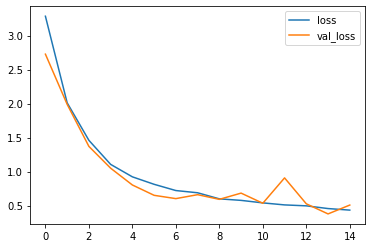

In [58]:
# Leraning curve MLP
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

In [59]:
val_performance = {}
performance = {}
Model={}

In [60]:
val_performance['MLP']=score_mlp[1]
performance['MLP']=score_test_mlp[1]
Model['MLP']='MLP'

The model was able to achieve an accuracy score of 83.61% without any preprocessing.

# Base cnn model

In [61]:
cnn_model = tf.keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.MaxPool2D(pool_size=(2,2)),# down sampling the output instead of 28*28 it is 14*14
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(), # flatten out the layers
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(43,activation = 'softmax')
    
])
#Compilation of the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15


In [62]:
history = cnn_model.fit(X_train, y_train_cnn,  epochs=epochs, validation_data=(X_val, y_val_cnn))

Epoch 1/15
551/551 [==============================] - 14s 24ms/step - loss: 9.8534 - accuracy: 0.4055 - val_loss: 0.6527 - val_accuracy: 0.8328
Epoch 2/15
551/551 [==============================] - 13s 24ms/step - loss: 0.6735 - accuracy: 0.8282 - val_loss: 0.6572 - val_accuracy: 0.8514
Epoch 3/15
551/551 [==============================] - 13s 24ms/step - loss: 0.4914 - accuracy: 0.8728 - val_loss: 0.5357 - val_accuracy: 0.8716
Epoch 4/15
551/551 [==============================] - 14s 25ms/step - loss: 0.5386 - accuracy: 0.8671 - val_loss: 0.3730 - val_accuracy: 0.9115
Epoch 5/15
551/551 [==============================] - 14s 26ms/step - loss: 0.3917 - accuracy: 0.8996 - val_loss: 0.4602 - val_accuracy: 0.8981
Epoch 6/15
551/551 [==============================] - 13s 24ms/step - loss: 0.3389 - accuracy: 0.9139 - val_loss: 0.3993 - val_accuracy: 0.9247
Epoch 7/15
551/551 [==============================] - 13s 24ms/step - loss: 0.4064 - accuracy: 0.9073 - val_loss: 0.3226 - val_accuracy:

In [63]:
score_cnn = cnn_model.evaluate(X_val, y_val_cnn,batch_size=1, verbose=0)
print('Test loss:', score_cnn[0], '   Test accuracy:', score_cnn[1])

Test loss: 0.42412441968917847    Test accuracy: 0.9437258839607239


In [64]:

pred_cnn = cnn_model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred_cnn))

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.8524940617577197


In [65]:
val_performance['CNN']= score_cnn[1]
performance['CNN']=accuracy_score(labels, pred_cnn)
Model['CNN']='CNN'

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']



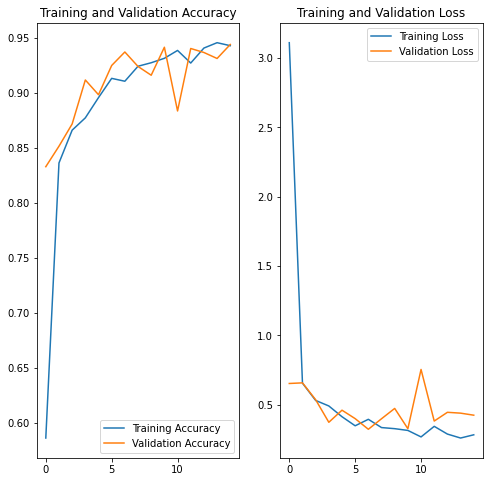

In [67]:
epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# SVM

In [68]:
#Normalize the data for SVM
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train_rs)
X_val_svm= sc.fit_transform(X_val_rs)
X_test_svm = sc.fit_transform(X_test_rs)

In [69]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',decision_function_shape='ovo')
#svclassifier = SVC(gamma=1,kernel='rbf')
svclassifier.fit(X_train_rs, y_train)
score_train = svclassifier.score(X_val_rs, y_val)
Pred_svm=svclassifier.predict(X_test_rs)    #prediction

In [70]:
score_train

0.9355570683004312

In [71]:
# Evaluate predictions
print(accuracy_score(labels, Pred_svm))
print(classification_report(labels, Pred_svm))

0.7991290577988915
              precision    recall  f1-score   support

           0       0.36      0.40      0.38        60
           1       0.69      0.85      0.76       720
           2       0.73      0.89      0.80       750
           3       0.65      0.76      0.70       450
           4       0.85      0.74      0.79       660
           5       0.71      0.78      0.74       630
           6       0.65      0.47      0.54       150
           7       0.89      0.72      0.80       450
           8       0.84      0.84      0.84       450
           9       0.95      0.84      0.89       480
          10       0.93      0.92      0.92       660
          11       0.85      0.90      0.87       420
          12       0.98      0.86      0.92       690
          13       0.95      0.98      0.97       720
          14       0.98      0.88      0.93       270
          15       0.80      0.84      0.82       210
          16       0.73      0.96      0.83       150
        

In [72]:
#plot for confusion matrix
def plot_cm(labels, predictions):
  cm = confusion_matrix(labels, predictions) 
  plt.figure(figsize=(15,15))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

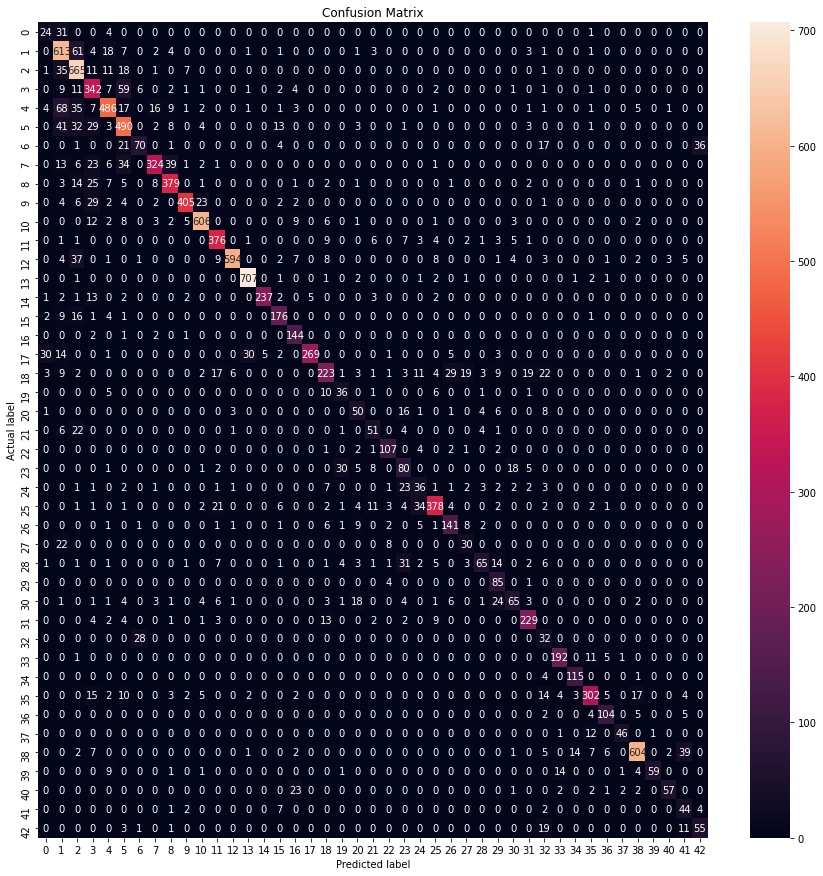

In [73]:
plot_cm(labels, Pred_svm)

In [74]:
val_performance['SVM']= score_train
performance['SVM']=accuracy_score(labels, Pred_svm)
Model['SVM']='SVM'

# Model Performance

In [75]:
Performance = pd.DataFrame(
    {'val': val_performance,
     'test': performance,
     'Model':Model
    })

In [76]:
df_accuracy = Performance.melt(id_vars=['Model'], var_name='Metric', value_name='Accuracy')

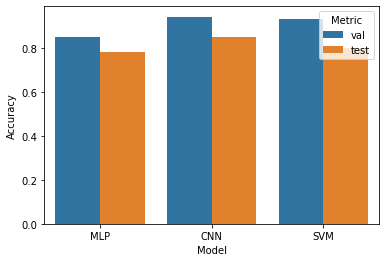

In [77]:
ax = sns.barplot(x="Model", y="Accuracy", hue="Metric", data=df_accuracy)

# PRE-PROCESSING STEPS

In [78]:
print("Number of training examples =", df_train.shape[0])
print("Number of testing examples =", df_test.shape[0])

print("Number of classes =", y_val_one_hot.shape[1])

Number of training examples = 39209
Number of testing examples = 12630
Number of classes = 43


Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.

Equalize histograms of training samples - by generation of additional, transformed images

In [79]:
from tqdm import tqdm
from scipy import ndimage
import cv2 

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img):    
    ang_range = 25
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
      
    img = cv2.warpAffine(img,Rot_M,(cols,rows))    
    img = augment_brightness_camera_images(img)
    
    return img

def get_random_image_of_given_label(images_set, labels_set, label):
    image_indexes = np.where(labels_set == label)
    rand_index = random.randint(0, np.bincount(labels_set)[label] - 1)
    return images_set[image_indexes][rand_index]

def equalize_samples_set(X_set, y_set):
    labels_count_arr = np.bincount(y_set)
    labels_bins = np.arange(len(labels_count_arr))
    
    ind = 0    
   
    for label in tqdm(labels_bins):        
        labels_no_to_add =  int(np.mean(labels_count_arr)) * 4 - labels_count_arr[label]
        
        ind = ind + 1
        X_temp = []
        y_temp = []
        
        for num in range(labels_no_to_add):      
            rand_image = get_random_image_of_given_label(X_set, y_set, label)
            X_temp.append(transform_image(rand_image))
            y_temp.append(label)            
   
        X_set = np.append(X_set, np.array(X_temp), axis=0)
        y_set = np.append(y_set, np.array(y_temp), axis=0)
        
    return X_set, y_set


100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:26<00:00,  1.64it/s]


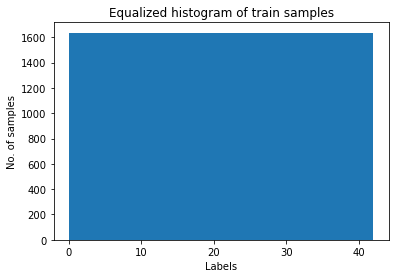

Train set increased from 17625 to 70348


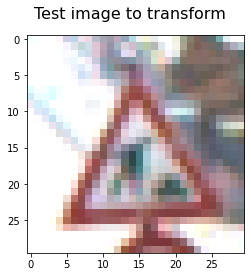

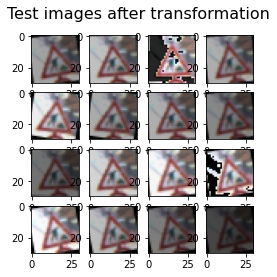

In [80]:
n_train = X_train.shape[0]
X_train_eq, y_train_eq = equalize_samples_set(X_train, y_train)


n_classes = len(np.unique(labels))
n, bins, patches = plt.hist(y_train_eq, n_classes)
plt.xlabel('Labels')
plt.ylabel('No. of samples')
plt.title('Equalized histogram of train samples')
plt.show()

print("Train set increased from {} to {}".format(n_train,X_train_eq.shape[0]))

fig=plt.figure()
fig.suptitle('Test image to transform', fontsize=16)
plt.imshow(X_train_eq[1000])

grid_len = 4
fig=plt.figure(figsize=(grid_len,grid_len))
fig.suptitle('Test images after transformation', fontsize=16)
 
for i in range(1,grid_len*grid_len+1):
    image = transform_image(X_train_eq[1000])
    plt.subplot(grid_len,grid_len,i)
    plt.imshow(image)

Image normalization and grayscale conversion

100%|███████████████████████████████████████████████████████████████████████████| 4407/4407 [00:00<00:00, 73640.27it/s]


Sample image dimension BEFORE processing: (30, 30, 3)
Sample image dimension AFTER processing: (30, 30, 3)


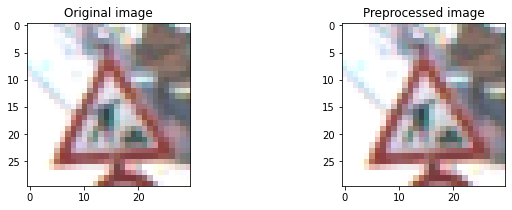

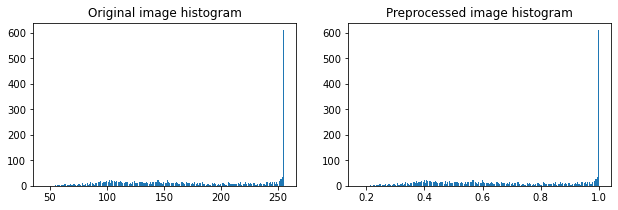

In [81]:
import cv2
import tensorflow as tf
# from tensorflow.contrib.layers import flatten

def grayscale(img):    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)[:,:,None]

def normalize(value):
    return value / 255

def preprocess_image(image):
    #img = grayscale(image)
    img = normalize(image)
    return img

from tqdm import tqdm
def preprocess_batch(images):
    imgs = np.zeros(shape=images.shape)
    processed_image_depth = preprocess_image(images[0]).shape[2]
    imgs = imgs[:,:,:,0:processed_image_depth]
    for i in tqdm(range(images.shape[0])):
        imgs[i] = preprocess_image(images[i])        
    return imgs


# X_train_eq, y_train_eq

X_train_processed = preprocess_batch(X_train_eq)
X_val_processed = preprocess_batch(X_val)

no_test_image = 1000

sample_image = X_train[no_test_image]
sample_image_processed = normalize(X_train_eq[no_test_image])
fig=plt.figure(figsize=(16,3))
sub=plt.subplot(131)
sub.set_title("Original image")
plt.imshow(sample_image)
sub=plt.subplot(132)
sub.set_title("Preprocessed image")
plt.imshow(sample_image_processed.squeeze(), cmap='gray')

print("Sample image dimension BEFORE processing: {}".format(sample_image.shape))
print("Sample image dimension AFTER processing: {}".format(sample_image_processed.shape))

image_depth = X_train_processed.shape[3]

sample_image = X_train[no_test_image]
dim1 = sample_image.shape[0]
dim2 = sample_image.shape[1]
dim3 = sample_image.shape[2]
sample_image_reshaped = np.reshape(sample_image, dim1*dim2*dim3)
plt.figure(figsize=(16,3))
sub=plt.subplot(131)
sub.set_title("Original image histogram")
n, bins, patches = plt.hist(sample_image_reshaped, 255)

sample_image_processed = X_train_processed[no_test_image]
dim1 = sample_image_processed.shape[0]
dim2 = sample_image_processed.shape[1]
dim3 = sample_image_processed.shape[2]
sample_image_processed_reshaped = np.reshape(sample_image_processed, dim1*dim2*dim3)
sub=plt.subplot(132)
sub.set_title("Preprocessed image histogram")
n, bins, patches = plt.hist(sample_image_processed_reshaped,255)

In [82]:
# # Flatten input: Changing dimension of input images from N*30*30*3 to N*2700
X_train_pr = X_train_processed.reshape([X_train_processed.shape[0], -1])
X_val_pr = X_val_processed.reshape([X_val_processed.shape[0], -1])

lb = LabelBinarizer()
y_train_eq_one_hot = lb.fit_transform(y_train_eq)


In [83]:
X_train_pr.shape

(70348, 2700)

In [84]:
y_train_eq_one_hot.shape

(70348, 43)

In [85]:
y_val_one_hot.shape

(4407, 43)

In [86]:
X_val_pr.shape

(4407, 2700)

In [87]:
X_train_processed.shape

(70348, 30, 30, 3)

In [88]:
y_train_eq.shape

(70348,)

# Models Improvement

## SVM

In [89]:
from sklearn.svm import SVC
svclassifier_pr = SVC(kernel='linear',decision_function_shape='ovo')
#svclassifier = SVC(gamma=1,kernel='rbf')
svclassifier_pr.fit(X_train_pr, y_train_eq)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [90]:
score_train_pr = svclassifier_pr.score(X_val_pr, y_val)

In [91]:
Pred_svm_pr=svclassifier_pr.predict(X_test_rs)    #prediction

In [92]:
score_train_pr

0.9357839800317677

In [93]:
# Evaluate predictions
print(accuracy_score(labels, Pred_svm_pr))
print(classification_report(labels, Pred_svm_pr))

0.7525732383214568
              precision    recall  f1-score   support

           0       0.11      0.42      0.17        60
           1       0.55      0.91      0.69       720
           2       0.64      0.86      0.74       750
           3       0.78      0.61      0.69       450
           4       0.94      0.62      0.75       660
           5       0.72      0.65      0.69       630
           6       0.89      0.47      0.61       150
           7       0.84      0.69      0.76       450
           8       0.87      0.64      0.74       450
           9       0.92      0.85      0.89       480
          10       0.99      0.89      0.94       660
          11       0.76      0.90      0.82       420
          12       0.98      0.88      0.93       690
          13       0.91      0.97      0.94       720
          14       0.98      0.87      0.92       270
          15       0.81      0.58      0.68       210
          16       0.90      0.91      0.90       150
        

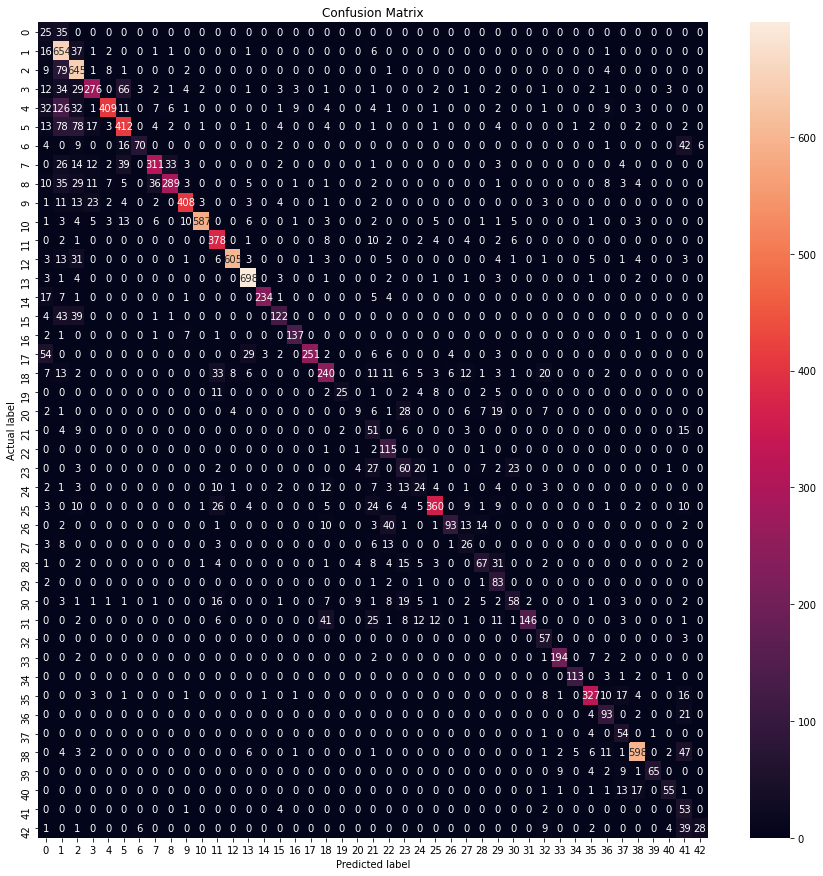

In [94]:
plot_cm(labels, Pred_svm_pr)

In [95]:
val_performance_pr = {}
performance_pr = {}
Model_pr={}

In [96]:
val_performance_pr['SVM']= score_train_pr
performance_pr['SVM']=accuracy_score(labels, Pred_svm_pr)
Model_pr['SVM']='SVM'

# CNN_1

In [97]:
img_height = 60
img_width = 60

In [98]:
y_train_prcnn = to_categorical(y_train_eq, 43)
y_val_prcnn = to_categorical(y_val, 43)

In [99]:
X_train_processed.shape

(70348, 30, 30, 3)

In [100]:
X_train.shape[1:]

(30, 30, 3)

In [101]:
cnn_ag_model = Sequential([
           
    Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(30,30,3)),
    MaxPool2D(pool_size=(2,2)),# down sampling the output instead of 28*28 it is 14*14
    Conv2D(32, kernel_size=(4, 4), activation='relu'), 
    Conv2D(32, kernel_size=(4, 4), activation='relu'), 
    MaxPool2D(pool_size=(2, 2)),  
#     Conv2D(64, kernel_size=(3,3), activation='relu'), 
#     Conv2D(64, kernel_size=(3,3), activation='relu'), 
#     MaxPool2D(pool_size=(2, 2)), 
    Dropout(0.3),
    Flatten(), # flatten out the layers
    Dense(256,activation='relu'),
    Dense(43,activation = 'softmax')
    
])



In [102]:
cnn_ag_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
history_ag = cnn_ag_model.fit(X_train_processed, y_train_prcnn,  epochs= 15, validation_data=(X_val_processed, y_val_prcnn))

Epoch 1/15
2199/2199 [==============================] - 43s 19ms/step - loss: 1.5164 - accuracy: 0.5836 - val_loss: 0.1213 - val_accuracy: 0.9637
Epoch 2/15
2199/2199 [==============================] - 44s 20ms/step - loss: 0.2086 - accuracy: 0.9377 - val_loss: 0.0784 - val_accuracy: 0.9789
Epoch 3/15
2199/2199 [==============================] - 44s 20ms/step - loss: 0.1323 - accuracy: 0.9600 - val_loss: 0.0520 - val_accuracy: 0.9850
Epoch 4/15
2199/2199 [==============================] - 44s 20ms/step - loss: 0.0989 - accuracy: 0.9693 - val_loss: 0.0449 - val_accuracy: 0.9873
Epoch 5/15
2199/2199 [==============================] - 45s 20ms/step - loss: 0.0824 - accuracy: 0.9751 - val_loss: 0.0429 - val_accuracy: 0.9873
Epoch 6/15
2199/2199 [==============================] - 45s 21ms/step - loss: 0.0740 - accuracy: 0.9763 - val_loss: 0.0276 - val_accuracy: 0.9925
Epoch 7/15
2199/2199 [==============================] - 45s 20ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.0234 -

In [104]:
score_cnn_pr2 = cnn_ag_model.evaluate(X_val, y_val_cnn,batch_size=1, verbose=0)
print('Test loss:', score_cnn_pr2[0], '   Test accuracy:', score_cnn_pr2[1])

Test loss: 8.642882347106934    Test accuracy: 0.9779895544052124


In [105]:
pred_cnn_pr2 = cnn_ag_model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred_cnn_pr2))

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.9277117973079968


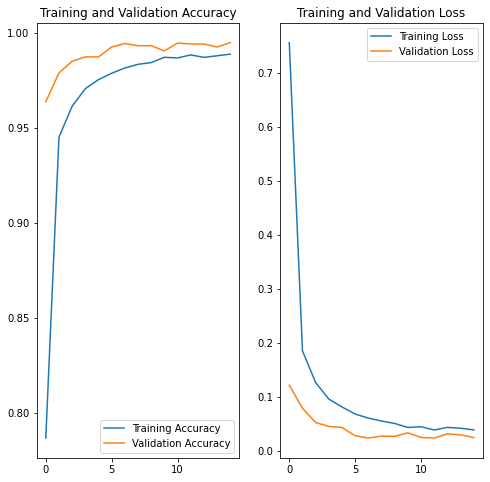

In [106]:
acc = history_ag.history['accuracy']
val_acc = history_ag.history['val_accuracy']

loss = history_ag.history['loss']
val_loss = history_ag.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [107]:
val_performance_pr['CNN_1']= score_cnn_pr2[1]
performance_pr['CNN_1']=accuracy_score(labels, pred_cnn_pr2)
Model_pr['CNN_1']='CNN_1'

# CNN_2

In [108]:
img_height = 60
img_width = 60

In [109]:
cnn_i_model = tf.keras.Sequential(
            [
    keras.layers.Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=X_train_processed.shape[1:]),
    keras.layers.MaxPool2D(pool_size=(2,2)),# down sampling the output instead of 28*28 it is 14*14
    keras.layers.Conv2D(64, kernel_size=(4, 4), activation='relu'), 
    keras.layers.Conv2D(64, kernel_size=(4, 4), activation='relu'), 
    keras.layers.MaxPool2D(pool_size=(2, 2)),                         
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(), # flatten out the layers
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(43,activation = 'softmax')
                

    
])
cnn_i_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
X_train_processed.shape[1:]

(30, 30, 3)

In [111]:
y_train.shape

(17625,)

In [112]:
X_val_processed.shape

(4407, 30, 30, 3)

In [113]:
y_val_cnn.shape

(4407, 43)

In [114]:
y_train_eq.shape

(70348,)

In [115]:
y_train_prcnn = to_categorical(y_train_eq, 43)
y_val_prcnn = to_categorical(y_val, 43)

In [116]:
historya = cnn_i_model.fit(X_train_processed, y_train_prcnn,  epochs= 15, validation_data=(X_val_processed, y_val_prcnn))

Epoch 1/15
2199/2199 [==============================] - 76s 34ms/step - loss: 1.4670 - accuracy: 0.5919 - val_loss: 0.0858 - val_accuracy: 0.9791
Epoch 2/15
2199/2199 [==============================] - 76s 35ms/step - loss: 0.1490 - accuracy: 0.9547 - val_loss: 0.0495 - val_accuracy: 0.9853
Epoch 3/15
2199/2199 [==============================] - 76s 34ms/step - loss: 0.0951 - accuracy: 0.9719 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 4/15
2199/2199 [==============================] - 77s 35ms/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.0327 - val_accuracy: 0.9914
Epoch 5/15
2199/2199 [==============================] - 76s 34ms/step - loss: 0.0568 - accuracy: 0.9832 - val_loss: 0.0255 - val_accuracy: 0.9925
Epoch 6/15
2199/2199 [==============================] - 77s 35ms/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0147 - val_accuracy: 0.9964
Epoch 7/15
2199/2199 [==============================] - 77s 35ms/step - loss: 0.0417 - accuracy: 0.9879 - val_loss: 0.0301 -

In [117]:
score_cnn_pr1 = cnn_i_model.evaluate(X_val, y_val_cnn,batch_size=1, verbose=0)
print('Test loss:', score_cnn_pr1[0], '   Test accuracy:', score_cnn_pr1[1])

Test loss: 30.481815338134766    Test accuracy: 0.9260267615318298


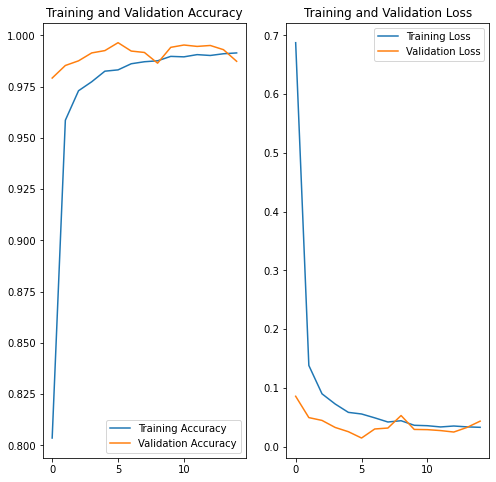

In [118]:
acc = historya.history['accuracy']
val_acc = historya.history['val_accuracy']

loss = historya.history['loss']
val_loss = historya.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [119]:
pred_cnn_pr1 = cnn_i_model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred_cnn_pr1))

0.8752969121140143


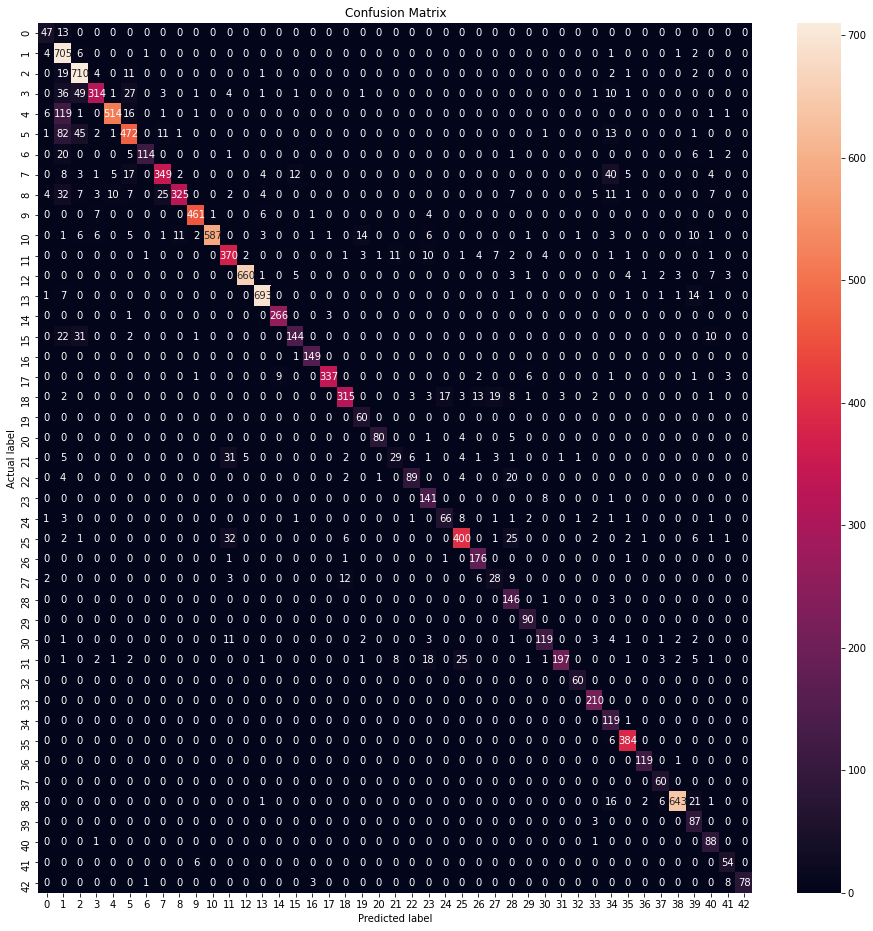

In [121]:
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_cm(labels, pred):
  cm = confusion_matrix(labels, pred)
  plt.figure(figsize=(16,16))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
    
plot_cm(labels, pred_cnn_pr1)  

In [122]:
val_performance_pr['CNN_2']= score_cnn_pr1[1]
performance_pr['CNN_2']=accuracy_score(labels, pred_cnn_pr1)
Model_pr['CNN_2']='CNN_2'

# Model Performance

In [123]:
Performance_pr = pd.DataFrame(
    {'val': val_performance_pr,
     'test': performance_pr,
     'Model':Model_pr
    })

In [124]:
df_accuracy_pr = Performance_pr.melt(id_vars=['Model'], var_name='Metric', value_name='Accuracy')

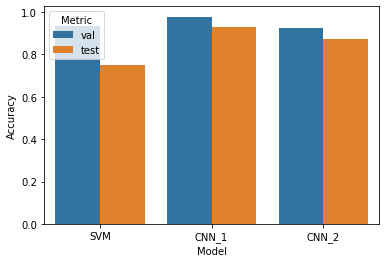

In [125]:
ax = sns.barplot(x="Model", y="Accuracy", hue="Metric", data=df_accuracy_pr)

# Explainable AI

In [181]:
from sklearn.metrics import accuracy_score
y_test_at = pd.read_csv("C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\Test.csv")
labels = y_test_at["ClassId"].values
imgs = y_test_at["Path"].values
data=[]
for img in imgs:
    image = Image.open("C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\"+img)
    image = image.resize((30,30))
    image = np.array(image)
    image = image.astype('float32')
    image /=255.0
    data.append(np.array(image))
X_test_at=np.array(data)

In [182]:
explainer = shap.GradientExplainer(cnn_ag_model, X_train_processed)

In [183]:
# we explain the model's predictions on the first three samples of the test set
shap_values = explainer.shap_values(X_test_at[:10])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


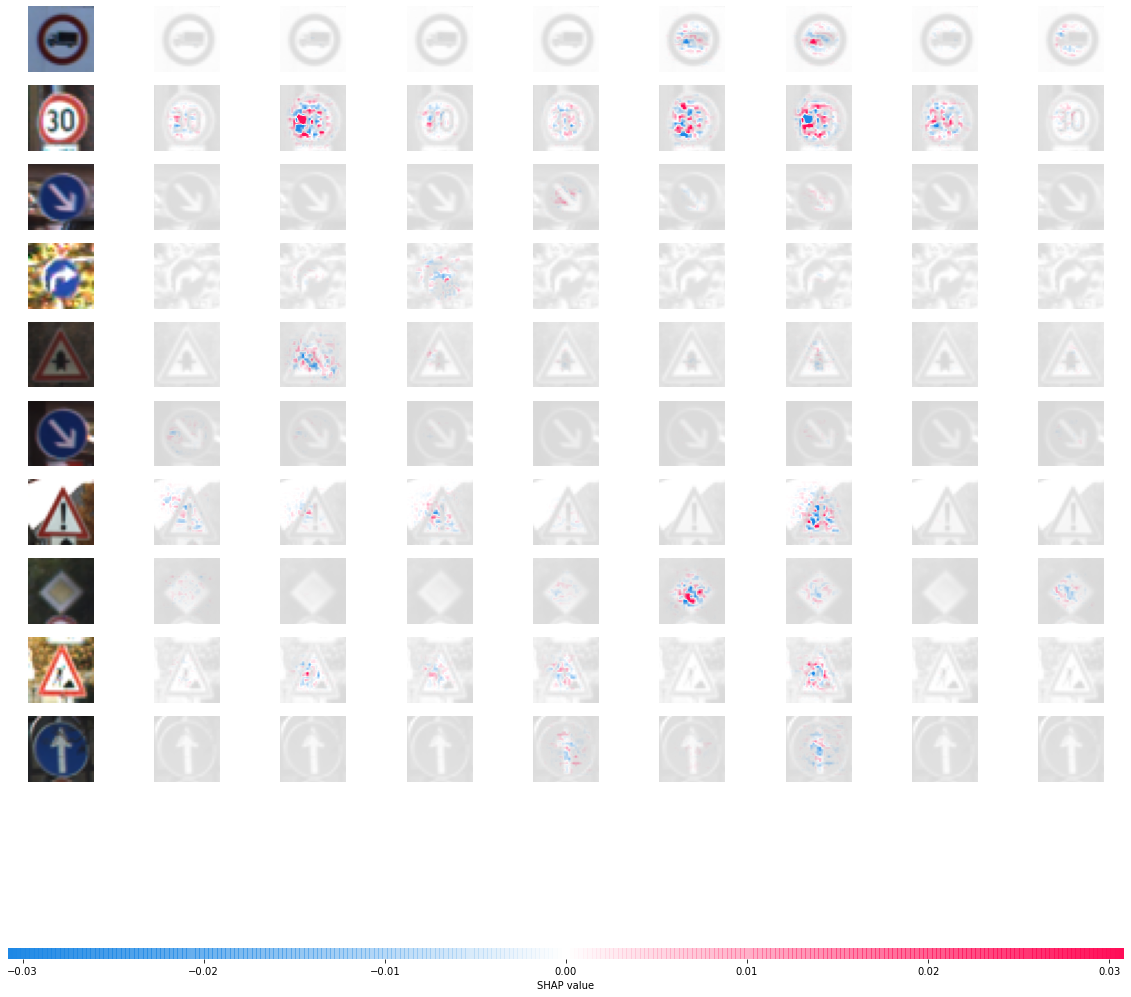

In [185]:
# here we plot the explanations for all classes for the first input (this is the feed forward input)
shap.image_plot([shap_values[i] for i in range(8)], X_test_at[:10])

# Object Detection

In [142]:
from tqdm import tqdm
import math
#Run this only once
#Creating validation directory
val_dir = 'C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\VALIDATION'
os.mkdir(val_dir)

n_classes = 43
train_dir = 'C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\Train{0}'

#Moving files from train to validation directory
for n in tqdm(range(n_classes)) :
  path = os.path.join(val_dir, str(n))
  os.mkdir(path)
  src_path = train_dir.format('/' + str(n))
  files = os.listdir(src_path)
  rand_idx = random.sample(range(len(files)), math.ceil(len(files)/4))
  for idx in rand_idx :
    src = src_path + "/" + files[idx]
    shutil.move(src, path)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:05<00:00,  7.40it/s]


In [143]:
#Setting up variables
IMG_WIDTH = 30
IMG_HEIGHT = 30
N_CHANNELS = 3
BATCH_SIZE = 32
N_EPOCHS = 10
VAL_BATCH_SIZE = 32
CLASS_NAMES = list(range(43))
N_CLASSES = 43

train_path = "C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train"         #Train dataset path
val_path = "C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\VALIDATION"      #Validation dataset path

In [144]:
import pathlib
import os
import ntpath
#Path to train and validation datasets
data_root_train = pathlib.Path(train_path)
data_root_val = pathlib.Path(val_path)

#Getting paths to all the images in train and validation sets
all_image_paths_train = list(data_root_train.glob('*/*'))
all_image_paths_train = [str(path).replace(os.sep,'/') for path in all_image_paths_train]

all_image_paths_val = list(data_root_val.glob('*/*'))
all_image_paths_val = [str(path).replace(os.sep,'/') for path in all_image_paths_val]

#Counting number of images in each sets
image_count_train = len(all_image_paths_train)
image_count_val = len(all_image_paths_val)
all_image_paths_train

['C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00001.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00002.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00003.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00005.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00006.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00008.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00009.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00010.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Train/0/00000_00000_00011.png',
 'C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent A

In [145]:
#Extracting labels for each image
label_names_train = sorted(int(item.name) for item in data_root_train.glob('*/') if item.is_dir())
label_names_val = sorted(int(item.name) for item in data_root_val.glob('*/') if item.is_dir())
label_to_index_train = dict((name, index) for index,name in enumerate(label_names_train))
label_to_index_val = dict((name, index) for index,name in enumerate(label_names_val))
all_image_labels_train = [label_to_index_train[int(pathlib.Path(path).parent.name)] for path in all_image_paths_train]
all_image_labels_val = [label_to_index_val[int(pathlib.Path(path).parent.name)] for path in all_image_paths_val]

In [146]:
df_train = pd.read_csv("C:\\Drive\\Siri\\MSDSBA\\4. IE7860 Intelligent Analytics\\Final Project\\Data\\Train.csv")
for idx, row in df_train.iterrows() :
  w = row['Width']
  h = row['Height']
  if w > IMG_WIDTH :
    diff = w-IMG_WIDTH
    df_train.iloc[idx, 4] = df_train.iloc[idx]['Roi.X2'] - diff
  else :
    diff = IMG_WIDTH-w
    df_train.iloc[idx, 4] = df_train.iloc[idx]['Roi.X2'] + diff
  if h > IMG_HEIGHT :
    diff = h - IMG_HEIGHT
    df_train.iloc[idx, 5] = df_train.iloc[idx]['Roi.Y2'] - diff
  else :
    diff = IMG_HEIGHT - h
    df_train.iloc[idx, 5] = df_train.iloc[idx]['Roi.Y2'] + diff

In [147]:
df_train

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,25,24,20,Train/20/00020_00000_00000.png
1,28,27,5,6,25,25,20,Train/20/00020_00000_00001.png
2,29,26,6,5,25,25,20,Train/20/00020_00000_00002.png
3,28,27,5,6,25,25,20,Train/20/00020_00000_00003.png
4,28,26,5,5,25,25,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,25,25,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,25,25,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,25,25,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,25,24,42,Train/42/00042_00007_00028.png


In [148]:
all_image_paths_val[6][83:]

'0/00000_00002_00014.png'

In [149]:
train_idx_list = []
val_idx_list = []

for path_tr in tqdm(all_image_paths_train) :
  train_idx_list.append(df_train[df_train['Path'] == path_tr[72 : ]].index[0])
for path_val in tqdm(all_image_paths_val) :
  path_val = "Train/" + path_val[83:]
  val_idx_list.append(df_train[df_train['Path'] == path_val].index[0])
new_df_train = pd.DataFrame()
new_df_val = pd.DataFrame()
new_df_train = new_df_train.append(df_train.iloc[train_idx_list], ignore_index = True)
new_df_val = new_df_val.append(df_train.iloc[val_idx_list], ignore_index = True)
new_df_train = new_df_train.drop(['Height', 'Width', 'ClassId', 'Path'], axis = 1)
new_df_val = new_df_val.drop(['Height', 'Width', 'ClassId', 'Path'], axis = 1)

100%|█████████████████████████████████████████████████████████████████████████████| 5523/5523 [00:18<00:00, 299.23it/s]


In [150]:
new_df_val

,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2
0,5,6,25,24
1,6,6,25,25
2,6,5,25,25
3,10,11,19,19
4,12,13,18,18
...,...,...,...,...
5518,7,7,24,24
5519,6,6,25,24
5520,5,6,25,25
5521,5,6,25,25


In [151]:
def tfdata_generator(images, labels, df, is_training, batch_size=32):
  '''Construct a data generator using tf.Dataset'''
  def parse_function(filename, labels, df):
    '''Function to preprocess the images'''
    #reading path 
    image_string = tf.io.read_file(filename)
    #decoding image
    image = tf.image.decode_png(image_string, channels=N_CHANNELS)
    # This will convert to float values in [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    #Adjusting contrast and brightness of the image
    if tf.math.reduce_mean(image) < 0.3 :
      image = tf.image.adjust_contrast(image, 5)
      image = tf.image.adjust_brightness(image, 0.2)
    #resize the image
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH], method="nearest", preserve_aspect_ratio=False)
    image = image/255.0
    #one hot coding for label
    #y = tf.one_hot(tf.cast(label, tf.uint8), N_CLASSES)
    return image, {"classification" : labels, "regression" : df}
  ##creating a dataset from tensorslices
  dataset = tf.data.Dataset.from_tensor_slices((images, labels, df))
  if is_training:
    dataset = dataset.shuffle(30000)  # depends on sample size
  # Transform and batch data at the same time
  dataset = dataset.map(parse_function, num_parallel_calls = tf.data.experimental.AUTOTUNE)
  dataset = dataset.repeat()
  dataset = dataset.batch(batch_size)
  #prefetch the data into CPU/GPU
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

In [152]:
tf_image_generator_train = tfdata_generator(all_image_paths_train, all_image_labels_train, new_df_train, is_training=True, batch_size=32)
tf_image_generator_val = tfdata_generator(all_image_paths_val, all_image_labels_val, new_df_val, is_training=False, batch_size=32)

In [153]:
steps_per_epoch_train = np.ceil(len(all_image_paths_train)/BATCH_SIZE)
steps_per_epoch_val = np.ceil(len(all_image_paths_val)/BATCH_SIZE)

In [154]:
class Sharpen(tf.keras.layers.Layer):
    def __init__(self, num_outputs) :
        super(Sharpen, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape) :
        self.kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        self.kernel = tf.expand_dims(self.kernel, 0)
        self.kernel = tf.expand_dims(self.kernel, 0)
        self.kernel = tf.cast(self.kernel, tf.float32)

    def call(self, input_) :
        return tf.nn.conv2d(input_, self.kernel, strides=[1, 1, 1, 1], padding='SAME')

In [161]:
def get_model() :
  #Input layer
  input_layer = Input(shape=(IMG_HEIGHT, IMG_WIDTH, N_CHANNELS, ), name="input_layer", dtype='float32')
  #Sharpen Layer to sharpen the edges of the image.
  sharp = Sharpen(num_outputs=(IMG_HEIGHT, IMG_WIDTH, N_CHANNELS, ))(input_layer)
  #Convolution, maxpool and dropout layers
  conv_1 = Conv2D(filters=32, kernel_size=(5,5), activation=relu,
                  kernel_initializer=he_normal(seed=54), bias_initializer=zeros(),
                  name="first_convolutional_layer") (sharp)
  conv_2 = Conv2D(filters=64, kernel_size=(3,3), activation=relu,
                  kernel_initializer=he_normal(seed=55), bias_initializer=zeros(),
                  name="second_convolutional_layer") (conv_1)                  
  maxpool_1 = MaxPool2D(pool_size=(2,2), name = "first_maxpool_layer")(conv_2)
  dr1 = Dropout(0.25)(maxpool_1)
  conv_3 = Conv2D(filters=64, kernel_size=(3,3), activation=relu,
                  kernel_initializer=he_normal(seed=56), bias_initializer=zeros(),
                  name="third_convolutional_layer") (dr1)
  maxpool_2 = MaxPool2D(pool_size=(2,2), name = "second_maxpool_layer")(conv_3)
  dr2 = Dropout(0.25)(maxpool_2) 
  flat = Flatten(name="flatten_layer")(dr2)

  #Fully connected layers
  d1 = Dense(units=256, activation=relu, kernel_initializer=he_normal(seed=45),
             bias_initializer=zeros(), name="first_dense_layer_classification", kernel_regularizer = l2(0.001))(flat)
  dr3 = Dropout(0.5)(d1)
  
  classification = Dense(units = 43, activation=None, name="classification",  kernel_regularizer = l2(0.0001))(dr3)
  
  regression = Dense(units = 4, activation = 'linear', name = "regression", 
                     kernel_initializer=RandomNormal(seed=43), kernel_regularizer = l2(0.1))(dr3)
  #Model
  model = Model(inputs = input_layer, outputs = [classification, regression])
  model.summary()
  return model

In [166]:
model = get_model()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 30, 30, 3)]  0                                            
__________________________________________________________________________________________________
sharpen_3 (Sharpen)             (None, 30, 30, 3)    0           input_layer[0][0]                
__________________________________________________________________________________________________
first_convolutional_layer (Conv (None, 26, 26, 32)   2432        sharpen_3[0][0]                  
__________________________________________________________________________________________________
second_convolutional_layer (Con (None, 24, 24, 64)   18496       first_convolutional_layer[0][0]  
______________________________________________________________________________________________

In [167]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score
class Metrics(Callback) :
  def __init__(self, validation_data_generator) :
    self.validation_data_generator = validation_data_generator

  def on_train_begin(self, logs={}) :
    '''
    This function initializes lists to store AUC and Micro F1 scores
    '''
    self.val_f1s = []
    self.val_precisions = []
    self.val_recalls = []
    self.batches = self.validation_data_generator.as_numpy_iterator()

  def on_epoch_end(self, epoch, logs = {}) :
    '''
    This function calculates the micro f1 and auc scores
    at the end of each epochs
    '''
    current_batch = self.batches.next()
    images = current_batch[0]
    labels = current_batch[1]
    labels = labels["classification"]
    labels = np.array(labels)
    pred = self.model.predict(images)
    pred = pred[0]
    val_predict = (np.asarray(pred)).round()
    idx = np.argmax(val_predict, axis=-1)
    a = np.zeros( val_predict.shape )
    a[ np.arange(a.shape[0]), idx] = 1
    val_predict = [np.where(r==1)[0][0] for r in a]
    val_predict = np.array(val_predict)
    val_targ = labels
    _val_f1 = f1_score(val_targ, val_predict, average = 'weighted')
    _val_precision = precision_score(val_targ, val_predict, average='weighted')
    _val_recall = recall_score(val_targ, val_predict, average='weighted')
    print("\nEpoch : {0} -  Precision_Score : {1:.2f} - Recall_Score : {2:.2f} - F1_Score : {3:.2f}\n".format(epoch, _val_precision, _val_recall, _val_f1))
    self.val_f1s.append(_val_f1)
    self.val_precisions.append(_val_precision)
    self.val_recalls.append(_val_recall)
    return

In [168]:
from keras import backend as K
def r2_keras(y_true, y_pred):
  SS_res =  K.sum(K.square(y_true - y_pred)) 
  SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
  return ( 1 - SS_res/(SS_tot + K.epsilon()) )

loss = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer="adam", loss = {"classification" : loss, "regression" : "mse"}, 
              metrics={"classification" : "acc", "regression" : r2_keras}, loss_weights = {"classification" : 5, "regression" : 1})

In [169]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, precision_score, recall_score, auc
import datetime
import time
%load_ext tensorboard
log_dir="/content/drive/My Drive/CaseStudy2/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
NAME = "TrafficSignRecog-first-cut-{0}".format(int(time.time()))
save_best_model = ModelCheckpoint(filepath='/content/drive/My Drive/CaseStudy2/best_models/{0}'.format(NAME), monitor='val_loss',
                                  save_best_only = True, mode = 'min', save_freq = 'epoch')
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,
                                   write_images = True)
early_stop = EarlyStopping(monitor='loss', min_delta=0.0001, patience=5)
metrics = Metrics(tf_image_generator_val)

In [170]:
history = model.fit_generator(
    generator = tf_image_generator_train, steps_per_epoch = steps_per_epoch_train, #train batch size
    epochs = N_EPOCHS,
    validation_data = tf_image_generator_val, validation_steps = steps_per_epoch_val, #val batch size
    callbacks = [save_best_model, tensorboard_callback, metrics, early_stop]
)

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
516/516 [==============================] - 47s 89ms/step - loss: 72.2791 - classification_loss: 5.9996 - regression_loss: 41.6961 - classification_acc: 0.0416 - regression_r2_keras: 0.5116 - val_loss: 26.0079 - val_classification_loss: 3.4892 - val_regression_loss: 7.9776 - val_classification_acc: 0.0652 - val_regression_r2_keras: 0.9064
INFO:tensorflow:Assets written to: /content/drive/My Drive/CaseStudy2/best_models\TrafficSignRecog-first-cut-1619199185\assets

Epoch : 0 -  Precision_Score : 0.00 - Recall_Score : 0.00 - F1_Score : 0.00

Epoch 2/10
  2/516 [..............................] - ETA: 35s - loss: 29.8586 - classification_loss: 3.9246 - regression_loss: 9.6517 - classification_acc: 0.0312 - regression_r2_keras: 0.8907 

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


516/516 [==============================] - 45s 88ms/step - loss: 25.4099 - classification_loss: 3.8305 - regression_loss: 5.6493 - classification_acc: 0.0496 - regression_r2_keras: 0.9344 - val_loss: 29.4814 - val_classification_loss: 3.3570 - val_regression_loss: 12.0150 - val_classification_acc: 0.1008 - val_regression_r2_keras: 0.8594

Epoch : 1 -  Precision_Score : 1.00 - Recall_Score : 0.44 - F1_Score : 0.61

Epoch 3/10
516/516 [==============================] - 51s 99ms/step - loss: 23.1141 - classification_loss: 3.3975 - regression_loss: 5.4269 - classification_acc: 0.1067 - regression_r2_keras: 0.9368 - val_loss: 20.2327 - val_classification_loss: 2.4776 - val_regression_loss: 7.1029 - val_classification_acc: 0.3289 - val_regression_r2_keras: 0.9163
INFO:tensorflow:Assets written to: /content/drive/My Drive/CaseStudy2/best_models\TrafficSignRecog-first-cut-1619199185\assets

Epoch : 2 -  Precision_Score : 1.00 - Recall_Score : 0.69 - F1_Score : 0.81

Epoch 4/10
  2/516 [.......

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


516/516 [==============================] - 46s 90ms/step - loss: 19.0518 - classification_loss: 2.4695 - regression_loss: 5.9696 - classification_acc: 0.3055 - regression_r2_keras: 0.9305 - val_loss: 13.4143 - val_classification_loss: 1.6061 - val_regression_loss: 4.6721 - val_classification_acc: 0.5638 - val_regression_r2_keras: 0.9446
INFO:tensorflow:Assets written to: /content/drive/My Drive/CaseStudy2/best_models\TrafficSignRecog-first-cut-1619199185\assets

Epoch : 3 -  Precision_Score : 1.00 - Recall_Score : 0.56 - F1_Score : 0.72

Epoch 5/10
  2/516 [..............................] - ETA: 36s - loss: 14.8115 - classification_loss: 1.7803 - regression_loss: 5.1987 - classification_acc: 0.4531 - regression_r2_keras: 0.9417

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


516/516 [==============================] - 45s 88ms/step - loss: 15.5096 - classification_loss: 1.7849 - regression_loss: 5.8759 - classification_acc: 0.4595 - regression_r2_keras: 0.9318 - val_loss: 15.2265 - val_classification_loss: 1.1002 - val_regression_loss: 9.0278 - val_classification_acc: 0.7003 - val_regression_r2_keras: 0.8940

Epoch : 4 -  Precision_Score : 1.00 - Recall_Score : 0.50 - F1_Score : 0.67

Epoch 6/10
516/516 [==============================] - 46s 90ms/step - loss: 13.6802 - classification_loss: 1.3884 - regression_loss: 6.0367 - classification_acc: 0.5689 - regression_r2_keras: 0.9297 - val_loss: 10.9685 - val_classification_loss: 0.7931 - val_regression_loss: 6.2916 - val_classification_acc: 0.7876 - val_regression_r2_keras: 0.9256
INFO:tensorflow:Assets written to: /content/drive/My Drive/CaseStudy2/best_models\TrafficSignRecog-first-cut-1619199185\assets

Epoch : 5 -  Precision_Score : 1.00 - Recall_Score : 0.78 - F1_Score : 0.88

Epoch 7/10
  2/516 [........

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


516/516 [==============================] - 47s 91ms/step - loss: 12.1381 - classification_loss: 1.1032 - regression_loss: 5.9076 - classification_acc: 0.6487 - regression_r2_keras: 0.9316 - val_loss: 8.5716 - val_classification_loss: 0.6273 - val_regression_loss: 4.7102 - val_classification_acc: 0.8150 - val_regression_r2_keras: 0.9440
INFO:tensorflow:Assets written to: /content/drive/My Drive/CaseStudy2/best_models\TrafficSignRecog-first-cut-1619199185\assets

Epoch : 6 -  Precision_Score : 1.00 - Recall_Score : 0.81 - F1_Score : 0.90

Epoch 8/10
  2/516 [..............................] - ETA: 36s - loss: 10.2619 - classification_loss: 0.9687 - regression_loss: 4.6934 - classification_acc: 0.7344 - regression_r2_keras: 0.9485

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


516/516 [==============================] - 48s 93ms/step - loss: 11.1957 - classification_loss: 0.9114 - regression_loss: 5.9033 - classification_acc: 0.7105 - regression_r2_keras: 0.9315 - val_loss: 9.0013 - val_classification_loss: 0.4725 - val_regression_loss: 5.8835 - val_classification_acc: 0.8708 - val_regression_r2_keras: 0.9303

Epoch : 7 -  Precision_Score : 1.00 - Recall_Score : 0.88 - F1_Score : 0.93

Epoch 9/10
516/516 [==============================] - 47s 92ms/step - loss: 10.6033 - classification_loss: 0.7886 - regression_loss: 5.8992 - classification_acc: 0.7481 - regression_r2_keras: 0.9315 - val_loss: 9.5444 - val_classification_loss: 0.4178 - val_regression_loss: 6.6773 - val_classification_acc: 0.8719 - val_regression_r2_keras: 0.9216

Epoch : 8 -  Precision_Score : 1.00 - Recall_Score : 0.97 - F1_Score : 0.98

Epoch 10/10
516/516 [==============================] - 49s 95ms/step - loss: 10.0784 - classification_loss: 0.6920 - regression_loss: 5.8321 - classification

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [171]:
test_df = pd.read_csv('C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Test.csv')
for idx, row in test_df.iterrows() :
  w = row['Width']
  h = row['Height']
  if w > IMG_WIDTH :
    diff = w-IMG_WIDTH
    test_df.iloc[idx, 4] = test_df.iloc[idx]['Roi.X2'] - diff
  else :
    diff = IMG_WIDTH-w
    test_df.iloc[idx, 4] = test_df.iloc[idx]['Roi.X2'] + diff
  if h > IMG_HEIGHT :
    diff = h - IMG_HEIGHT
    test_df.iloc[idx, 5] = test_df.iloc[idx]['Roi.Y2'] - diff
  else :
    diff = IMG_HEIGHT - h
    test_df.iloc[idx, 5] = test_df.iloc[idx]['Roi.Y2'] + diff

In [173]:
def evaluate_test_images(path, model) :
  labels = []
  bbox = []
  all_imgs = os.listdir(path)
  all_imgs.sort()
  for img in tqdm(all_imgs) :
    if '.png' in img :
      image_string = tf.io.read_file(path + '/' + img)
      image = tf.image.decode_png(image_string, channels=N_CHANNELS)
      image = tf.image.convert_image_dtype(image, tf.float32)
      if tf.math.reduce_mean(image) < 0.3 :
        image = tf.image.adjust_contrast(image, 5)
        image = tf.image.adjust_brightness(image, 0.2)
      image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH], method="nearest", preserve_aspect_ratio=False)
      image = image/255.0
      image = np.expand_dims(image, axis=0)
      pred = model.predict(image)
      labels.append(np.argmax(pred[0][0]))
      bbox.append(pred[1][0])
  return labels, bbox

In [174]:
model.compile()

In [175]:
test_path = "C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Test"
labels, bbox = evaluate_test_images(test_path, model)

100%|████████████████████████████████████████████████████████████████████████████| 12630/12630 [09:04<00:00, 23.19it/s]


In [176]:
from sklearn.metrics import f1_score, mean_squared_error, precision_score, recall_score
test_precision = precision_score(test_df['ClassId'], labels, average='weighted')
test_recall = recall_score(test_df['ClassId'], labels, average='weighted')
test_f1_score = f1_score(test_df['ClassId'], labels, average = 'weighted')
test_mse = mean_squared_error(test_df.iloc[:, 2:6], bbox)

In [177]:
print("Test Precision : {0:.2f}".format(test_precision))
print("Test Recall : {0:.2f}".format(test_recall))
print("Test f1-score : {0:.2f}".format(test_f1_score))
print("Test Mean squared error : {0:.2f}".format(test_mse))

Test Precision : 0.89
Test Recall : 0.88
Test f1-score : 0.87
Test Mean squared error : 3.20


In [178]:
 pip install pillow

Note: you may need to restart the kernel to use updated packages.


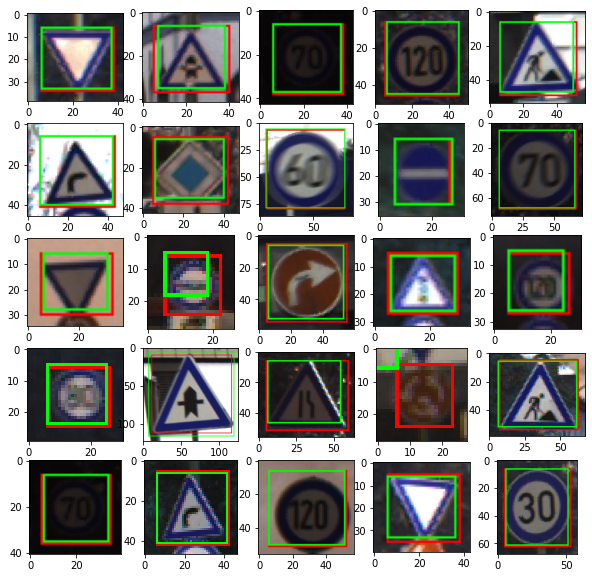

In [179]:
#Plotting some correctly classified images :
from PIL import Image
import matplotlib.pyplot as plt
import math
test_df = pd.read_csv('C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/Test.csv')
test_path = "C:/Drive/Siri/MSDSBA/4. IE7860 Intelligent Analytics/Final Project/Data/"
fig, ax = plt.subplots(5, 5)
fig.set_size_inches((10, 10))
cnt = 0
i = 0
j = 0
while cnt < 25 :
  idx = random.randint(0, test_df.shape[0])
  if test_df.iloc[idx]['ClassId'] == labels[idx] :
    x1, y1, x2, y2 = test_df.iloc[idx, 2:6]
    img = cv2.imread(test_path + test_df.iloc[idx]['Path'])
    height = img.shape[0]
    width = img.shape[1]
    px1, py1, px2, py2 = bbox[idx][0], bbox[idx][1], bbox[idx][2], bbox[idx][3]
    if width > IMG_WIDTH :
      diff = width - IMG_WIDTH
      px2 += diff
    elif width < IMG_WIDTH :
      px2 -= diff
    else :
      pass
    if height > IMG_HEIGHT :
      diff = height - IMG_HEIGHT
      py2 += diff
    elif height < IMG_HEIGHT :
      py2 -= diff
    else :
      pass
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1) #Actual bounding box (Red)
    img = cv2.rectangle(img, (math.ceil(px1), math.ceil(py1)), (math.ceil(px2), math.ceil(py2)), (0,255,0), 1) #predicted bounding box (Green)
    ax[i][j].imshow(img)
    j+=1
    if j == 5 :
      i+=1
      j = 0
    cnt+=1
plt.show()